In [82]:
#import necessary packages
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import cf_matrix


In [3]:
np.random.seed(1)

#Data Preprocessing

In [4]:
#load dataset
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
#Shape of data
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [6]:
#dev/validation set from train set
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]


In [7]:
print(x_train.shape,x_valid.shape,x_test.shape)

(55000, 28, 28) (5000, 28, 28) (10000, 28, 28)


In [8]:
#reshape data from 28,28 to 28,28,1
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_valid=x_valid.reshape(x_valid.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)


# One-hot encode the labels
#y_train = tf.keras.utils.to_categorical(y_train, 10)
#y_valid = tf.keras.utils.to_categorical(y_valid, 10)
#y_test = tf.keras.utils.to_categorical(y_test, 10)

In [9]:
#images set shape
print(x_train.shape,x_valid.shape,x_test.shape)

(55000, 28, 28, 1) (5000, 28, 28, 1) (10000, 28, 28, 1)


In [10]:
#labels set shape
print(y_train.shape,y_valid.shape,y_test.shape)

(55000,) (5000,) (10000,)


In [11]:
#labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

In [12]:
#normalizing data to bring it at 1 scale
x_train=x_train.astype('float32')/255
x_valid=x_valid.astype('float32')/255
x_test=x_test.astype('float32')/255

#Modeling

In [51]:
#initialize a sequential model
model=tf.keras.Sequential()

In [52]:
#Add layers to model
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=2,padding='same',activation='relu',input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))


model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=2,padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [53]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 128)       640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        32832     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 3136)             

In [54]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [55]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)

In [56]:
model.fit(x=x_train,y=y_train,batch_size=64,epochs=10,validation_data=(x_valid,y_valid),callbacks=[checkpointer])

Epoch 1/10
860/860 [==============================] - 7s 8ms/step - loss: 0.7602 - accuracy: 0.7168 - val_loss: 0.3458 - val_accuracy: 0.8754

Epoch 00001: val_loss improved from inf to 0.34584, saving model to model.weights.best.hdf5
Epoch 2/10
860/860 [==============================] - 7s 8ms/step - loss: 0.3732 - accuracy: 0.8645 - val_loss: 0.3088 - val_accuracy: 0.8862

Epoch 00002: val_loss improved from 0.34584 to 0.30877, saving model to model.weights.best.hdf5
Epoch 3/10
860/860 [==============================] - 7s 8ms/step - loss: 0.3229 - accuracy: 0.8813 - val_loss: 0.2636 - val_accuracy: 0.9040

Epoch 00003: val_loss improved from 0.30877 to 0.26364, saving model to model.weights.best.hdf5
Epoch 4/10
860/860 [==============================] - 7s 8ms/step - loss: 0.3021 - accuracy: 0.8864 - val_loss: 0.2500 - val_accuracy: 0.9080

Epoch 00004: val_loss improved from 0.26364 to 0.25005, saving model to model.weights.best.hdf5
Epoch 5/10
860/860 [============================

#Model Evaluation

In [57]:
model.load_weights('model.weights.best.hdf5')

In [58]:
score=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2281 - accuracy: 0.9196


In [59]:
y_pred = model.predict(x_test)

In [63]:
print("\n Accuracy : ",score[1]*100)


 Accuracy :  91.96000099182129


In [61]:
y_pred_classes=[np.argmax(element) for element in y_pred]

In [64]:
#classification report
print("Classification Report \n",metrics.classification_report(y_test,y_pred_classes))

Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.86      0.89      0.87      1000
           3       0.93      0.92      0.93      1000
           4       0.84      0.91      0.87      1000
           5       0.99      0.99      0.99      1000
           6       0.83      0.67      0.74      1000
           7       0.96      0.98      0.97      1000
           8       0.99      0.99      0.99      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [87]:
#Precision & Recall & F1 Score
print("Precision : ",metrics.precision_score(y_test,y_pred_classes,average='weighted')*100)
print("Recall    : ",metrics.recall_score(y_test,y_pred_classes,average='weighted')*100)
print("F1 Score  : ",metrics.f1_score(y_test,y_pred_classes,average='weighted')*100)

Precision :  91.96667434224072
Recall    :  91.96
F1 Score  :  91.8441526626691


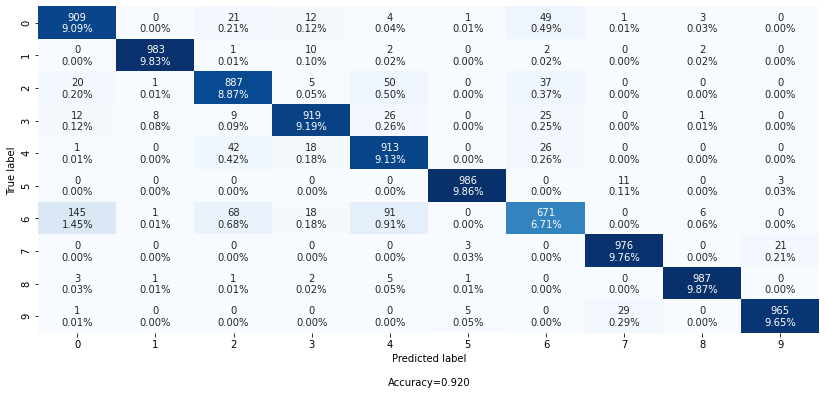

In [89]:
confusion=metrics.confusion_matrix(y_test,y_pred_classes)
cf_matrix.make_confusion_matrix(confusion, figsize=(14,6), cbar=False)

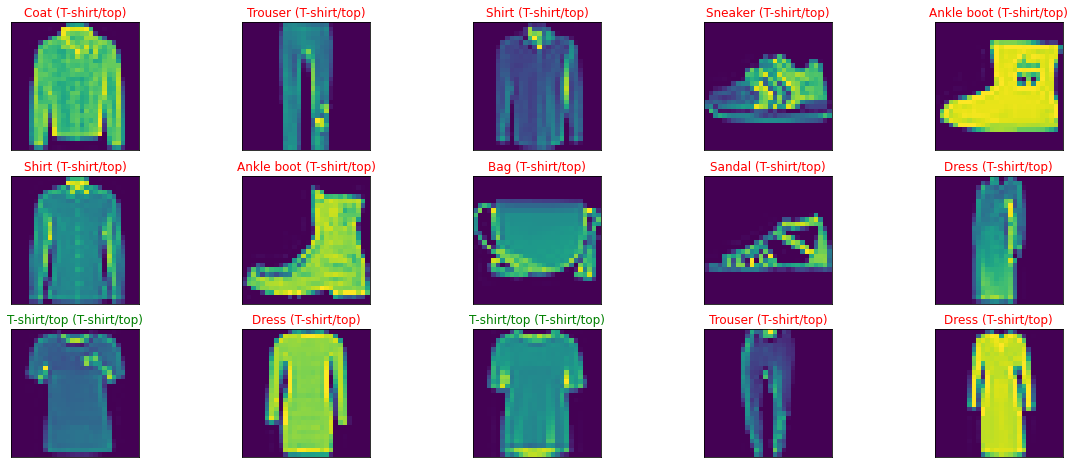

In [91]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

#ANN Model

In [35]:
model2=tf.keras.Sequential()

In [39]:
model2.add(tf.keras.layers.Flatten(input_shape=(28,28,1)))
model2.add(tf.keras.layers.Dense(3000,activation='relu'))
model2.add(tf.keras.layers.Dense(1000,activation='relu'))
model2.add(tf.keras.layers.Dense(10,activation='softmax'))

model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model2.fit(x_train,y_train,batch_size=64,epochs=10)

Epoch 1/10
860/860 [==============================] - 4s 4ms/step - loss: 0.3508 - accuracy: 0.9056
Epoch 2/10
860/860 [==============================] - 3s 4ms/step - loss: 0.2196 - accuracy: 0.9207
Epoch 3/10
860/860 [==============================] - 3s 4ms/step - loss: 0.2272 - accuracy: 0.9175
Epoch 4/10
860/860 [==============================] - 3s 4ms/step - loss: 0.2178 - accuracy: 0.9213
Epoch 5/10
860/860 [==============================] - 4s 4ms/step - loss: 0.1980 - accuracy: 0.9285
Epoch 6/10
860/860 [==============================] - 4s 4ms/step - loss: 0.1992 - accuracy: 0.9255
Epoch 7/10
860/860 [==============================] - 4s 4ms/step - loss: 0.1962 - accuracy: 0.9268
Epoch 8/10
860/860 [==============================] - 4s 4ms/step - loss: 0.1837 - accuracy: 0.9314
Epoch 9/10
860/860 [==============================] - 3s 4ms/step - loss: 0.1742 - accuracy: 0.9352
Epoch 10/10
860/860 [==============================] - 3s 4ms/step - loss: 0.1704 - accuracy: 0.9366

In [40]:
score=model2.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3649 - accuracy: 0.8894


In [41]:
print("Accuracy",score[1]*100)

Accuracy 88.94000053405762
